# 美国各州犯罪率数据的聚类分析

In [1]:
library(factoextra)
library(animation)
library(gridExtra)
library(cluster)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [2]:
df <- USArrests

In [3]:
str(df)

'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


## 预处理&EDA

In [4]:
df <- scale(df)
head(df)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


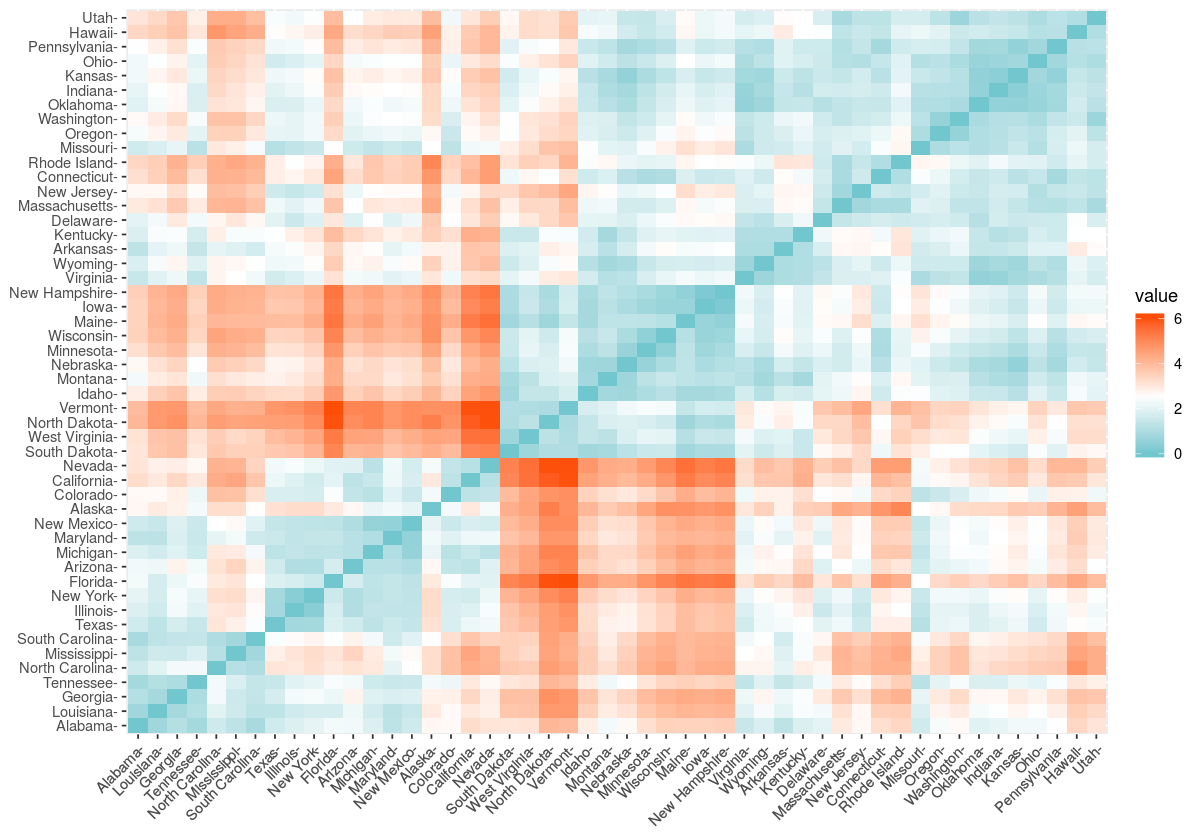

In [28]:
# 距离矩阵可视化
options(repr.plot.hight=7, repr.plot.width=10)
distance <- get_dist(df)
distPlot <- fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))
distPlot

In [29]:
ggsave(filename = 'pics/distPlot.png', distPlot, dpi=300)

Saving 6.67 x 6.67 in image


## KMeans聚类

### 初始聚类(centers=2)

In [6]:
k2 <- kmeans(df, centers = 2, nstart = 25)
str(k2)

List of 9
 $ cluster     : Named int [1:50] 1 1 1 2 1 1 2 2 1 1 ...
  ..- attr(*, "names")= chr [1:50] "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ centers     : num [1:2, 1:4] 1.005 -0.67 1.014 -0.676 0.198 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "Murder" "Assault" "UrbanPop" "Rape"
 $ totss       : num 196
 $ withinss    : num [1:2] 46.7 56.1
 $ tot.withinss: num 103
 $ betweenss   : num 93.1
 $ size        : int [1:2] 20 30
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


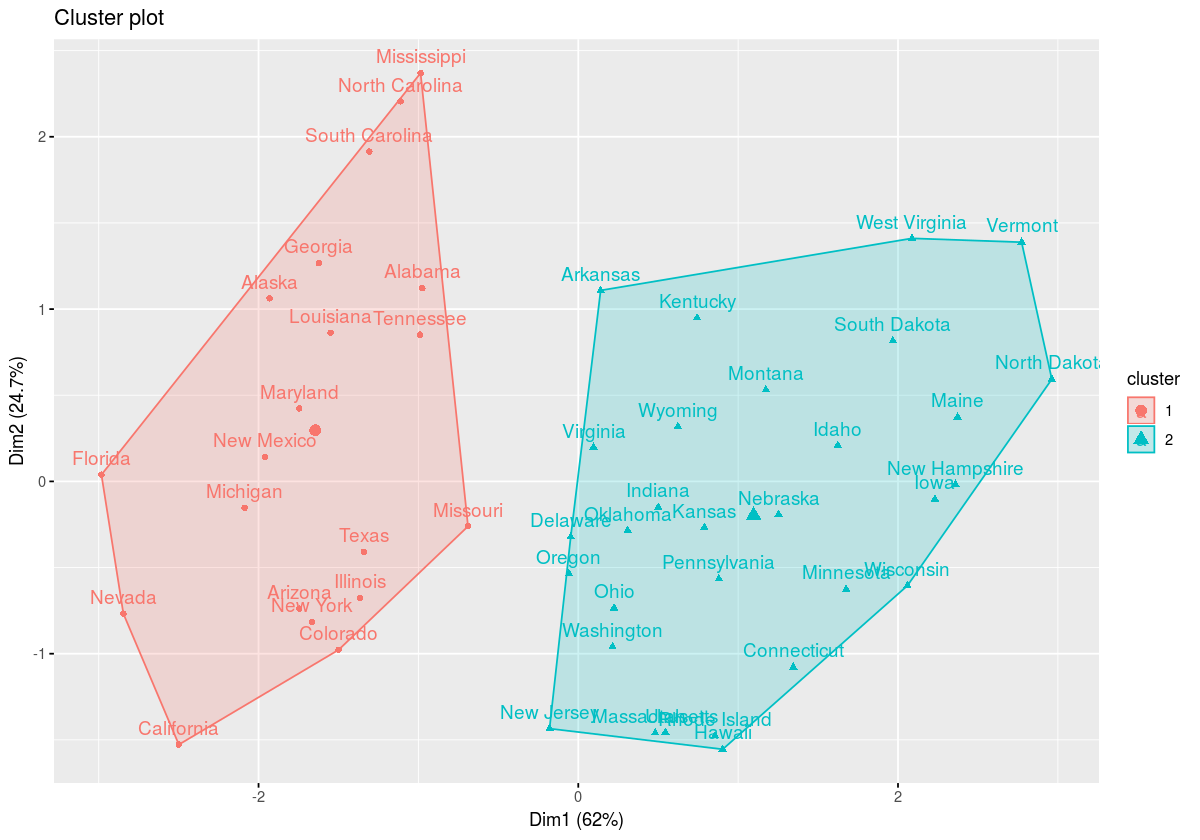

In [7]:
fviz_cluster(k2, data = df)

这里的可视化部分，在数据维度高于2的时候会自动进行PCA，并选取前两个主成分做图。

### 多次聚类(centers=2，3，4，5)

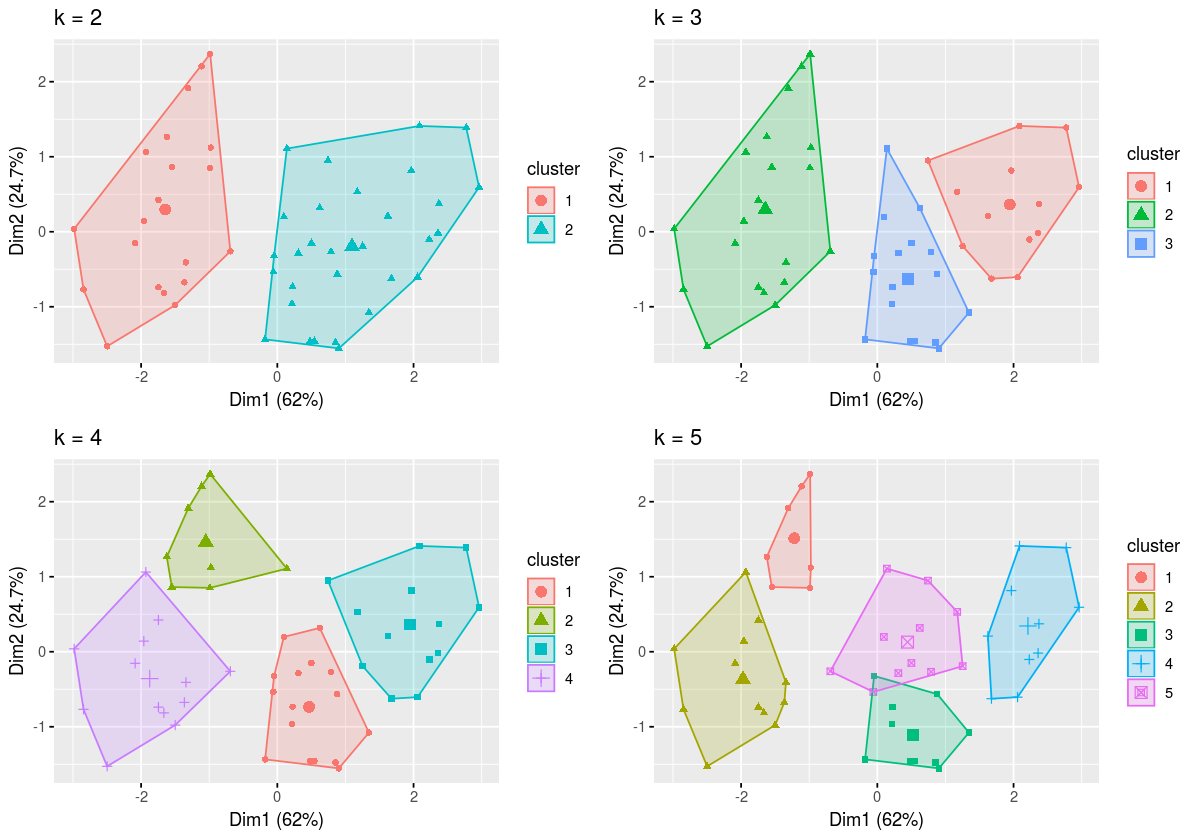

In [26]:
# Multi-k
k3 <- kmeans(df, centers = 3, nstart = 25)
k4 <- kmeans(df, centers = 4, nstart = 25)
k5 <- kmeans(df, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = df) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = df) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = df) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = df) + ggtitle("k = 5")

library(gridExtra)
multiK <- grid.arrange(p1, p2, p3, p4, nrow = 2)

In [27]:
ggsave(filename = 'pics/multiK.png', multiK, dpi=300)

Saving 6.67 x 6.67 in image


### 决定最优聚类中心个数
方法有很多，这里选择`Gap Statistic Method`

In [9]:
set.seed(123)
gap_stat <- clusGap(df, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
# Print the result
print(gap_stat, method = "firstmax")

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = df, FUNcluster = kmeans, K.max = 10, B = 50, nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 4
          logW   E.logW       gap     SE.sim
 [1,] 3.458369 3.640154 0.1817845 0.04422857
 [2,] 3.135112 3.372283 0.2371717 0.03559601
 [3,] 2.977727 3.233771 0.2560446 0.03749193
 [4,] 2.826221 3.119172 0.2929511 0.04067348
 [5,] 2.738868 3.019965 0.2810969 0.04185469
 [6,] 2.666967 2.930002 0.2630347 0.04105040
 [7,] 2.609895 2.852152 0.2422572 0.04184725
 [8,] 2.539156 2.778562 0.2394054 0.04292750
 [9,] 2.468162 2.711752 0.2435901 0.04344197
[10,] 2.407265 2.647595 0.2403307 0.04548446


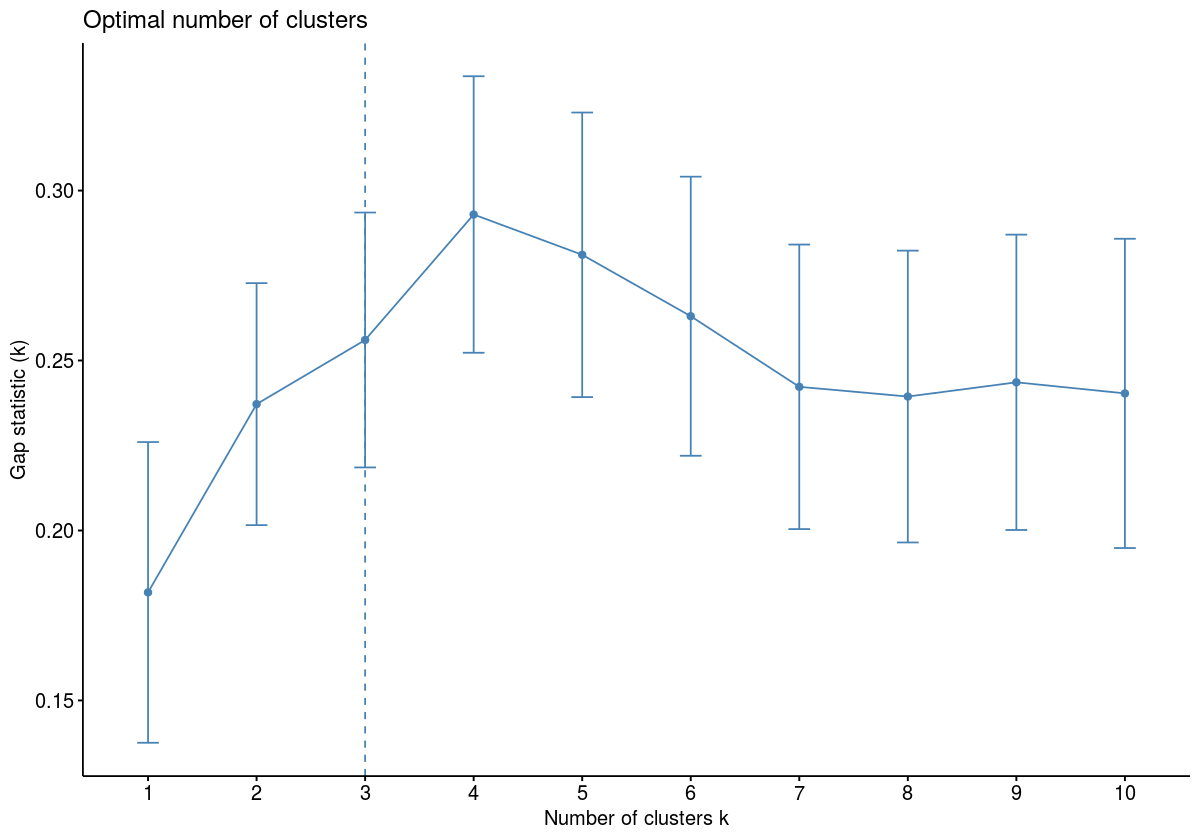

In [24]:
gap_plot <- fviz_gap_stat(gap_stat)
gap_plot

In [25]:
ggsave(filename = 'pics/gapPlot.png', gap_plot, dpi=300)

Saving 6.67 x 6.67 in image


由以上，我们发现最佳的聚类数目为4，所以我们进行最终的聚类。

### 最终聚类


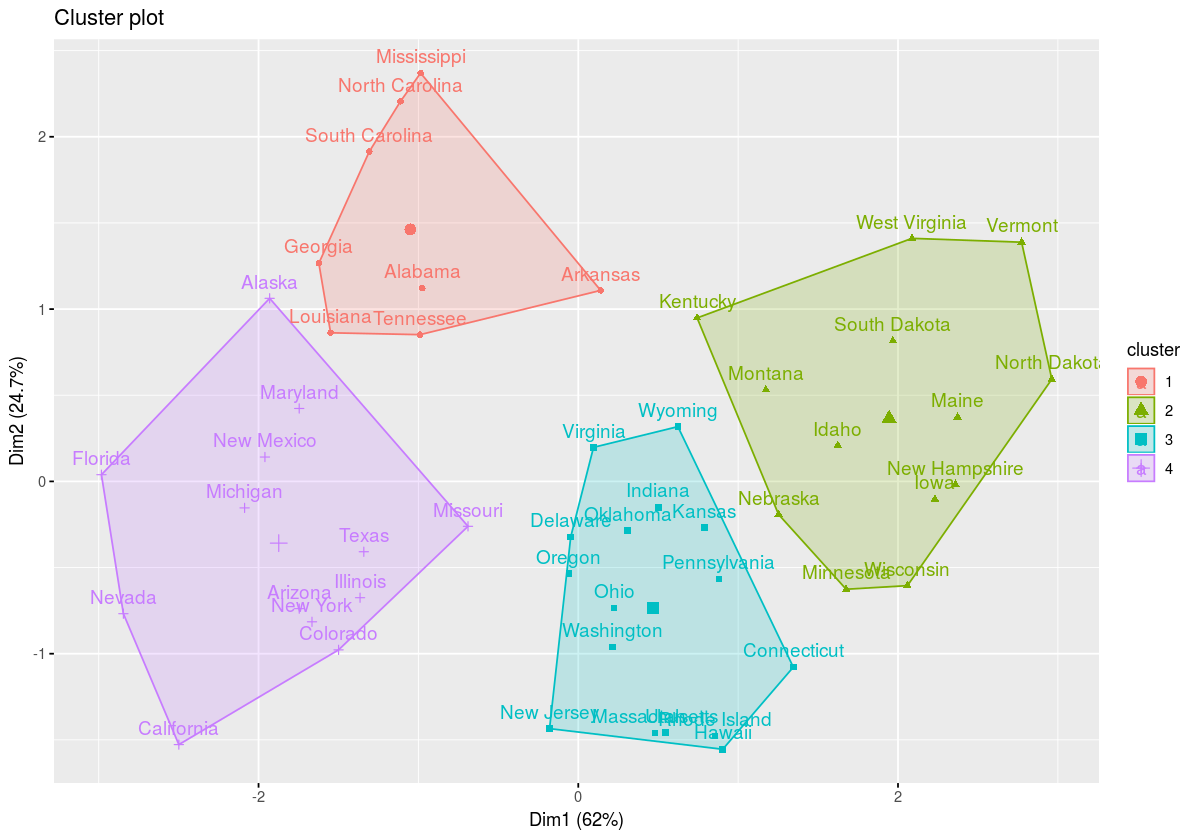

In [16]:
set.seed(123)
final <- kmeans(df, 4, nstart = 25)
final_plot <- fviz_cluster(final, data = df)
final_plot

In [20]:
ggsave(filename = 'pics/final.png', final_plot, dpi = 300)

Saving 6.67 x 6.67 in image


下面分别看下各个聚类的统计数据。

In [12]:
USArrests %>%
  mutate(Cluster = final$cluster) %>%
  group_by(Cluster) %>%
  summarise_all("mean")

ERROR: Error in USArrests %>% mutate(Cluster = final$cluster) %>% group_by(Cluster) %>% : could not find function "%>%"


## 动画展示

In [23]:
ani.options(interval = 1)
par(mar = c(3, 3, 1, 1.5), mgp = c(1.5, 0.5, 0))
saveGIF(kmeans.ani(df, 4), movie.name = "animation.gif")

Error in cmd.fun(sprintf("%s --version", convert), intern = TRUE) : 
  error in running command


I cannot find ImageMagick with convert = 'magick'
I find ImageMagick with convert = 'convert'. I will use 'convert' instead of 'magick'!
Executing: 
convert -loop 0 -delay 100 Rplot1.png Rplot2.png Rplot3.png Rplot4.png
    Rplot5.png Rplot6.png Rplot7.png Rplot8.png Rplot9.png Rplot10.png
    Rplot11.png Rplot12.png 'animation.gif'
Output at: animation.gif


[1] TRUE

![](pics/animation.gif)